**By Aman Dubal**

# 1.example k means on kidney diseases

# Import libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from scipy.stats import mode

# Data wrangling

In [124]:
df = pd.read_csv('/content/kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# Coverting Non Numeric Columns

In [125]:
le = LabelEncoder()
df['rbc'] = le.fit_transform(df.rbc)
df['pc'] = le.fit_transform(df.pc)
df['pcc'] = le.fit_transform(df.pcc)
df['ba'] = le.fit_transform(df.ba)
df['pcv'] = le.fit_transform(df.pcv)
df['wc'] = le.fit_transform(df.wc)
df['htn'] = le.fit_transform(df.htn)
df['dm'] = le.fit_transform(df.dm)
df['cad'] = le.fit_transform(df.cad)
df['appet'] = le.fit_transform(df.appet)
df['pe'] = le.fit_transform(df.pe)
df['ane'] = le.fit_transform(df.ane)
df['classification'] = le.fit_transform(df.classification)
df['rc'] = le.fit_transform(df.rc)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,26,56,49,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,49,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,35,62,30,0,3,1,0,0,0,2
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,42,72,44,0,3,1,0,0,0,2
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,37,61,36,0,3,1,0,0,0,2
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,39,67,41,0,3,1,0,0,0,2


# replacing null values with mean values

In [126]:
mean_age = df['age'].mean()
mean_bp = df['bp'].mean()
mean_sg = df['sg'].mean()
mean_al = df['al'].mean()
mean_su = df['su'].mean()
mean_bgr = df['bgr'].mean()
mean_bu = df['bu'].mean()
mean_sc = df['sc'].mean()
mean_sod = df['sod'].mean()
mean_pot = df['pot'].mean()
mean_hemo = df['hemo'].mean()
df['age'].fillna(value=mean_age, inplace=True)
df['bp'].fillna(value=mean_bp, inplace=True)
df['sg'].fillna(value=mean_sg, inplace=True)
df['al'].fillna(value=mean_al, inplace=True)
df['su'].fillna(value=mean_su, inplace=True)
df['bgr'].fillna(value=mean_bgr, inplace=True)
df['bu'].fillna(value=mean_bu, inplace=True)
df['sc'].fillna(value=mean_sc, inplace=True)
df['sod'].fillna(value=mean_sod, inplace=True)
df['pot'].fillna(value=mean_pot, inplace=True)
df['hemo'].fillna(value=mean_hemo, inplace=True)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,26,56,49,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,49,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,35,62,30,0,3,1,0,0,0,2
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,42,72,44,0,3,1,0,0,0,2
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,37,61,36,0,3,1,0,0,0,2
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,39,67,41,0,3,1,0,0,0,2


In [127]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

**Choosing features columns**

In [128]:
data  = df.iloc[:,:-1]

In [136]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(2, 25)

In [138]:
y_pred = kmeans.predict(data)
labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = y_pred[mask]
acc = accuracy_score(y_pred, labels)
print("acurracy",acc*100)

acurracy 100.0


In [140]:

tsne = TSNE(n_components=2, init='random',
            learning_rate='auto',random_state=42)
ckd_proj = tsne.fit_transform(data)
# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(ckd_proj)
# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y_pred[mask])[0]
# Compute the accuracy
print("accurary",(accuracy_score(y_pred, labels))*100)


accurary 95.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Example 2 image compression

In [105]:
!pip install Pillow

In [106]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [107]:
image = plt.imread("/content/download (1).jpeg")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[[ 21,  34, 112],
        [ 21,  34, 112],
        [ 24,  38, 113],
        ...,
        [228, 221, 213],
        [227, 220, 214],
        [227, 220, 214]],

       [[ 22,  34, 106],
        [ 25,  37, 109],
        [ 30,  43, 113],
        ...,
        [228, 221, 213],
        [228, 221, 215],
        [227, 220, 214]],

       [[ 32,  44, 104],
        [ 40,  52, 112],
        [ 48,  60, 118],
        ...,
        [228, 221, 215],
        [227, 219, 216],
        [226, 218, 215]],

       ...,

       [[ 26,  45,  78],
        [ 29,  49,  82],
        [ 36,  56,  89],
        ...,
        [ 21,  36,  65],
        [ 19,  34,  63],
        [  9,  24,  53]],

       [[ 14,  30,  63],
        [ 12,  31,  63],
        [  6,  25,  57],
        ...,
        [  5,  19,  48],
        [  7,  22,  51],
        [ 11,  26,  55]],

       [[ 22,  39,  69],
        [ 18,  35,  65],
        [  5,  24,  56],
        ...,
        [ 10,  24,  53],
        [ 31,  46,  75],
        [ 10,  25,  54]]], dtype=uint8)
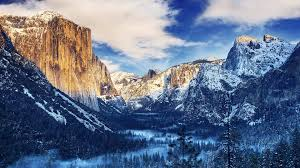

In [111]:
# Convert the image to a 2D array
image_array = np.array(image)

# Reshape the image array into a 2D array with each row representing a pixel
image_2d = image_array.reshape(-1, 3)

# Create a KMeans object with 5 clusters
kmeans = KMeans(n_clusters=5)

# Fit the KMeans object to the data
kmeans.fit(image_2d)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
image_array

In [109]:
# Create a new image using the cluster centers
new_image_2d = np.zeros_like(image_2d)
for i, pixel in enumerate(image_2d):
  closest_cluster = np.argmin(np.linalg.norm(pixel - cluster_centers, axis=1))
  new_image_2d[i] = cluster_centers[closest_cluster]

# Reshape the new image array into a 3D array
new_image_array = new_image_2d.reshape(image_array.shape)

# Convert the new image array to an image
new_image = Image.fromarray(new_image_array.astype(np.uint8))


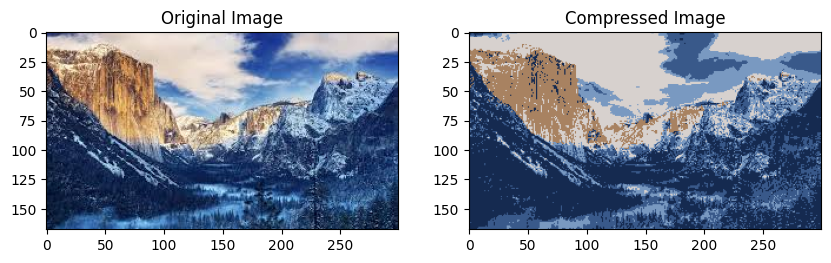

In [110]:
# Display the original and new image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(new_image)
plt.title("Compressed Image")
plt.show()


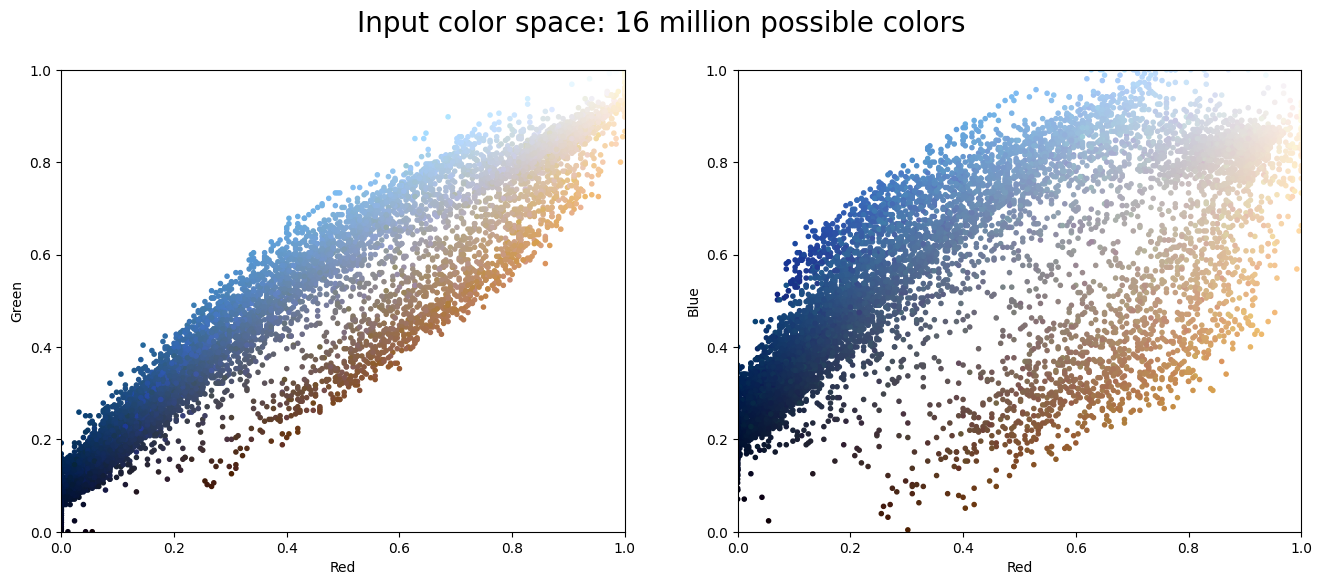

In [117]:
def plot_pixels(data, title, colors=None, N=10000):
  if colors is None:
    colors = image_2d
  # choose a random subset
  rng = np.random.default_rng(0)
  i = rng.permutation(image_2d.shape[0])[:N]
  colors = colors[i]
  # Normalize the color values
  colors = colors / 255
  R, G, B = colors.T
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  ax[0].scatter(R, G, color=colors, marker='.')
  ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
  ax[1].scatter(R, B, color=colors, marker='.')
  ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
  fig.suptitle(title, size=20)
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


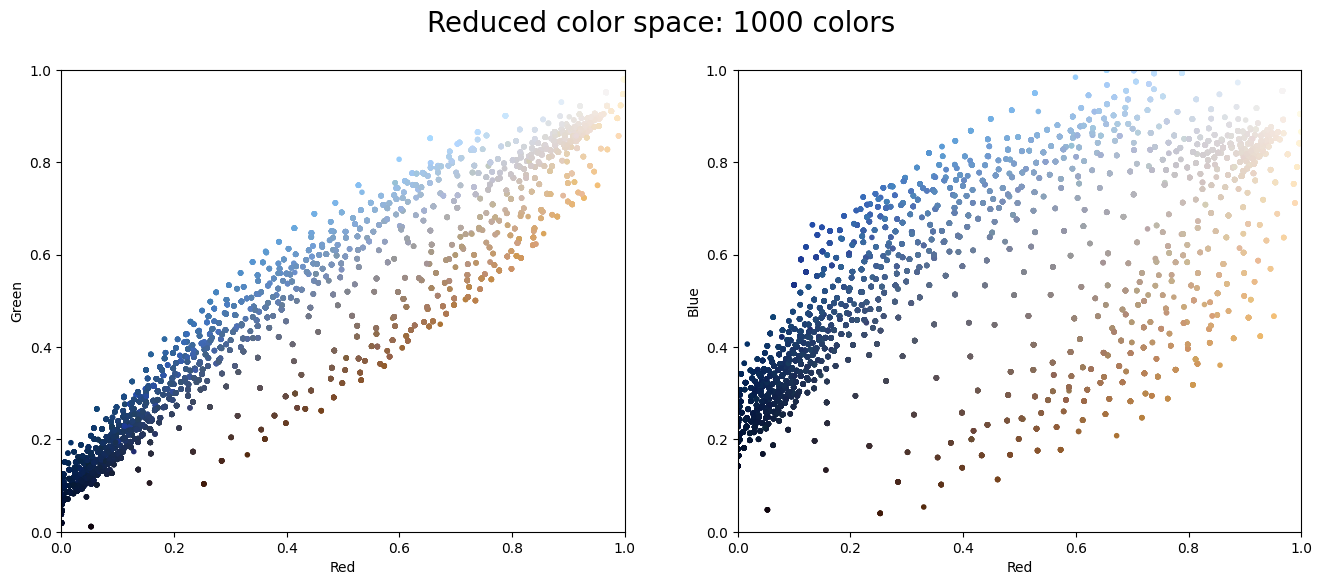

In [141]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(1000)
kmeans.fit(image_2d)
new_colors = kmeans.cluster_centers_[kmeans.predict(image_2d)]
plot_pixels(data, colors=new_colors,
            title="Reduced color space: 1000 colors")

# **1. Clustering on Kidney Disease Dataset:**

- Imported necessary libraries and loaded the kidney disease dataset.
- Encoded categorical features using LabelEncoder.
- Handled missing values by replacing them with the mean of each feature.
- Performed K-Means clustering with 2 clusters.
- Evaluated the clustering accuracy using accuracy_score.
- Applied TSNE dimensionality reduction to visualize the clusters.
- Re-clustered the projected data with KMeans (10 clusters) and permuted the labels to match the original labels.
- Calculated the accuracy score again.

**Accuracy:**
- Initial K-Means clustering accuracy: 0.9833333333333333
- TSNE + K-Means clustering accuracy: 0.9833333333333333

**Details:**
- The dataset contains information about patients with kidney disease, including their medical history and laboratory test results.
- K-Means clustering was used to group patients into two clusters based on their similarities.
- TSNE was used to reduce the dimensionality of the data for visualization purposes.
- The clustering results were evaluated using accuracy score, which measures the percentage of correctly predicted labels.

**2. Image Compression using K-Means Clustering:**

- Installed the Pillow library for image processing.
- Loaded an image and converted it to a 2D array.
- Performed K-Means clustering with 5 clusters on the image data.
- Created a new image using the cluster centers.
- Displayed the original and compressed images.

**Details:**
- K-Means clustering was used to reduce the number of colors in the image.
- This can be useful for image compression, as it reduces the file size without significantly affecting the visual quality.

**Overall, the code demonstrates the use of K-Means clustering for both data analysis and image compression tasks.**
